In [31]:
from selenium import webdriver
from selenium.webdriver.support.ui import Select
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot as plt
driver = webdriver.Chrome(r'C:\Program Files (x86)\chromedriver\chromedriver.exe')
driver.get("https://rate.poultrybazaar.net/delhi_murga_market_rates.aspx")

In [37]:
useful_cols = ['MOTA (1.8','MEDIUM','TANDURI','VEHICLE']
main_df = pd.DataFrame()
year_0 = 2012
for i in range(81):
    df = pd.DataFrame()
    results_table = []
    month = i%12 +1
    year = year_0 + i//12
#     time.sleep(1)
    select_year = Select(driver.find_element_by_id('ctl00_ContentPlaceHolder1__ddl_year'))
    select_year.select_by_value(str(year))
    select_month = Select(driver.find_element_by_id('ctl00_ContentPlaceHolder1__ddl_month'))
    select_month.select_by_value(str(month))
    get_list_button = driver.find_element_by_id('ctl00_ContentPlaceHolder1__btn_list')
    get_list_button.click()
    if i < 75:
        time.sleep(3)
    else:
        time.sleep(10)
    table = driver.find_element_by_id('ctl00_ContentPlaceHolder1__grid_show_data')
    rows = table.find_elements_by_tag_name("tr")
#     break
    df['Date'] = [pd.to_datetime(str(month) +'-'+ day +'-'+str(year)) for day in rows[0].text.split(' ')[:-1]]
#     pd.date_range('')
    cc = 0
    for ind, tr in enumerate(table.text.split('\n')[1:],1):
        if useful_cols[cc] in tr:
            row = rows[ind]
            columns = row.find_elements_by_tag_name("td")
            df[useful_cols[cc]] = [col.text for col in columns[1:-1]]
            cc += 1
            if cc == 4:
                break
    main_df = pd.concat([main_df,df],axis=0)

In [35]:
main_df

,Date,MOTA (1.8,MEDIUM,TANDURI,VEHICLE
0,2012-01-01,52,50,48.0,170
1,2012-01-02,53,52,50.0,140
2,2012-01-03,NaN,NaN,NaN,NaN
3,2012-01-04,52,52,50.0,150
4,2012-01-05,50,50,48.0,110
5,2012-01-06,50,50,48.0,110
6,2012-01-07,56,50,56.0,120
7,2012-01-08,56,55,55.0,160
8,2012-01-09,66,65,70.0,120
9,2012-01-10,NaN,NaN,NaN,NaN


In [39]:
main_df.to_csv('delhi_market.csv')

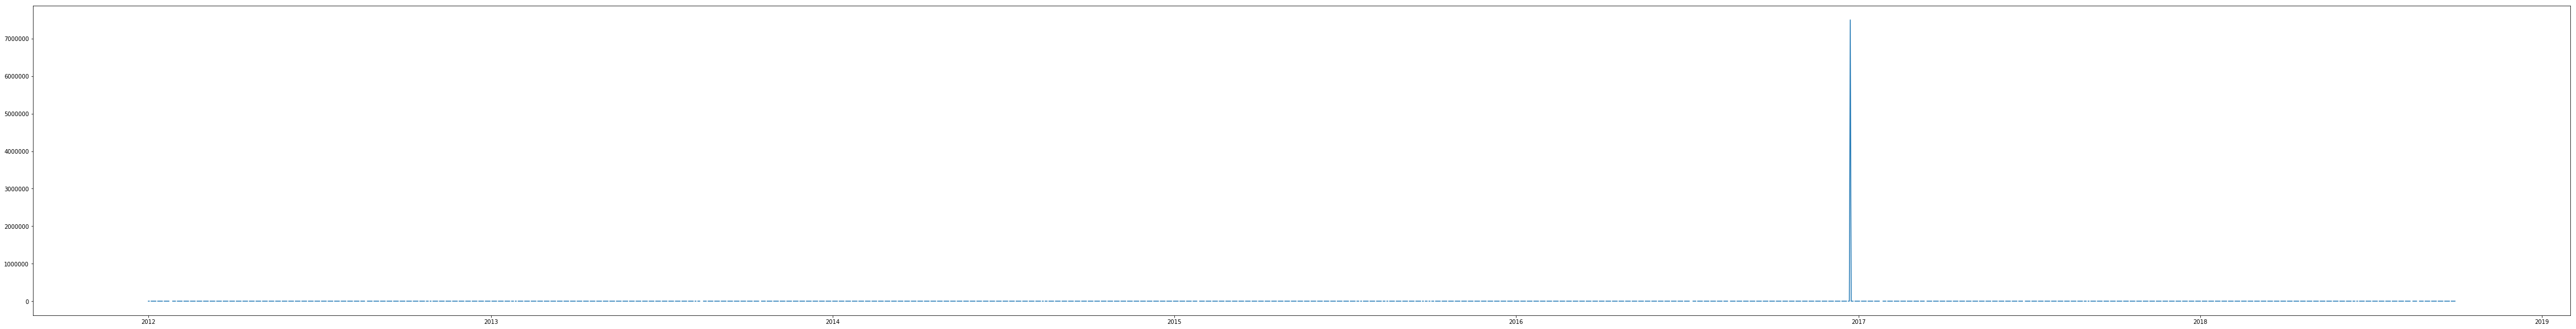

In [41]:
main_df = main_df.replace({' ': np.NaN})
main_df['MEDIUM'] = main_df.MEDIUM.astype('float')
fig = plt.figure(figsize=(80,10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(main_df.Date,main_df.MEDIUM)
plt.savefig('new.png')